In [1]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_classification, make_regression
from sklearn.metrics import classification_report, accuracy_score
from sklearn import linear_model
import scipy.optimize as opt

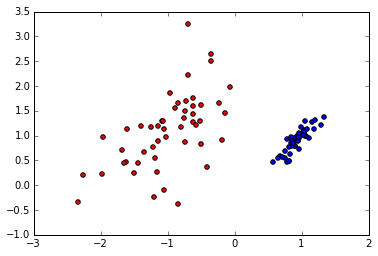

In [2]:
# randomly generate a regression sample dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1) 

class0 = np.where(y==0)[0]
class1 = np.where(y==1)[0]

plt.scatter(X[class0, 0], X[class0, 1], c='r')
plt.scatter(X[class1, 0], X[class1, 1], c='b')
plt.show()

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cost(theta, X, y):
    m = len(X)
    h = sigmoid(np.dot(X, theta)) 
    loss = ((-y * np.log(h) - (1 - y) * np.log(1 - h + 1e-15)) * X.T).sum()
    return loss / m

def regu_cost(theta, X, y, regu=0.1):
    m = len(X)
    h = sigmoid(np.dot(X, theta)) 
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h+1e-15) * X.T)
    return (loss.T + ((regu / m) * theta)).sum() / m

def grad(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    grad = np.dot(h - y, X) / y.size
    return grad

def predict(theta, X):
#     h = sigmoid(np.dot(X, theta))
    h = sigmoid(theta[0] + X.dot(theta[1:].T))
    return h > 0.5

def predict_proba(theta, x):
    return sigmoid(theta[0] + x.dot(theta[1:].T))

In [4]:
def gradient_descent(x, y, alpha=0.01, iterations=1000, stop=0.0001):
    m = len(x)
    
    gradient = []
    
    a = np.ones(shape=(len(x), 1))  
    x_ = np.hstack((a, x))
    theta = np.random.rand(x_.shape[1])
    initial_loss = cost(theta, x_, y)
    
    for n in xrange(iterations):    
        g = grad(theta, x_, y)
        theta = theta - alpha * g
        loss = regu_cost(theta, x_, y)
        
        if np.abs(initial_loss - loss) <= stop:
            print 'converged with {} iterations'.format(n)
            return theta, gradient
        
        initial_loss = loss
        gradient.append([n, initial_loss])
        
    print 'max iterations reached'
    return theta, gradient

In [5]:
theta, gradient = gradient_descent(X, y)
print theta

max iterations reached
[ 0.05313207  2.31455153 -0.21709776]


In [6]:
y_true = y
y_pred = predict(theta, X)

print 'Accuracy: {:.2f}%'.format(100 * accuracy_score(y_true, y_pred))
print classification_report(y_true, y_pred)

Accuracy: 100.00%
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       100



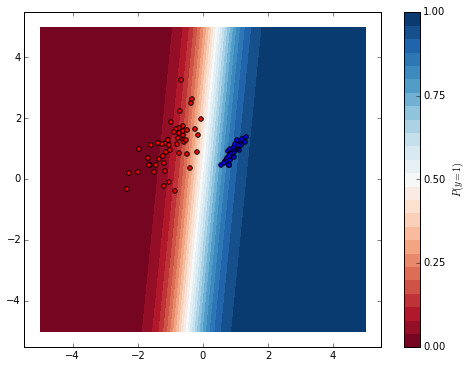

In [7]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = predict_proba(theta, grid).reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[class0, 0], X[class0, 1], c='r')
ax.scatter(X[class1, 0], X[class1, 1], c='b')
plt.show()

In [8]:
from sklearn import datasets

In [9]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

print X_digits.shape, y_digits.shape, np.unique(y_digits)

(1797, 64) (1797,) [0 1 2 3 4 5 6 7 8 9]


In [10]:
y_cleaned = np.array([yy if yy == 0 else 1 for yy in y_digits])
print np.unique(y_cleaned)
import collections
print collections.Counter(y_cleaned)

[0 1]
Counter({1: 1619, 0: 178})


converged with 1 iterations


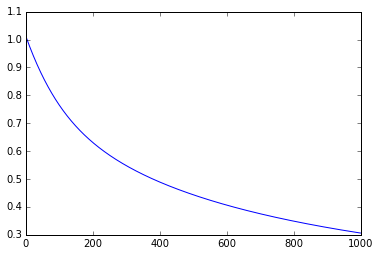

In [11]:
digits_theta, digits_gradient = gradient_descent(X_digits, y_cleaned, iterations=1000)

x_axes, y_axes = zip(*gradient)
plt.plot(x_axes, [ax for ax in y_axes])
plt.show()

In [12]:
opt_digits_theta = np.random.randn(X_digits.shape[1] + 1)
X_1_digits = np.append(np.ones((X_digits.shape[0], 1)), X_digits, axis=1)

opt_theta = opt.fmin_bfgs(cost, opt_digits_theta, fprime=grad, args=(X_1_digits, y_cleaned))

         Current function value: 1131.250283
         Iterations: 0
         Function evaluations: 17
         Gradient evaluations: 5


In [13]:
y_true = y_cleaned
y_pred = predict(digits_theta, X_digits)

print 'Accuracy: {:.2f}%'.format(100 * accuracy_score(y_true, y_pred))
print classification_report(y_true, y_pred)

Accuracy: 90.09%
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       178
          1       0.90      1.00      0.95      1619

avg / total       0.81      0.90      0.85      1797



/Users/danilonunes/.virtualenvs/dns/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
